# **Preprocessing**

### **Imports**
---

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

### **Load the data**
-----

In [40]:
train = pd.read_csv('../data/train_cleaned.csv')
train.head()

,Id,parcel_id,dwelling_type,zoning_type,lot_frontage,lot_area,street_surface,alley_surface,property_shape,property_flatness,...,screen_porch_size,pool_size,pool_quality,fence_quality,misc_features,misc_features_value,month_sold,year_sold,sale_type,SalePrice
0,544,531379050,60,RL,43.0,11492.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,4,2009,WD,220000.0
1,153,535304180,20,RL,68.0,7922.0,Pave,NaN,Reg,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,1,2010,WD,109000.0
2,318,916386060,60,RL,73.0,9802.0,Pave,NaN,Reg,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,4,2010,WD,174000.0
3,255,906425045,50,RL,82.0,14235.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,3,2010,WD,138500.0
4,2827,908186070,180,RM,35.0,3675.0,Pave,NaN,Reg,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,6,2006,New,140000.0


In [41]:
test = pd.read_csv('../data/test_cleaned.csv')
test.head()

,Id,parcel_id,dwelling_type,zoning_type,lot_frontage,lot_area,street_surface,alley_surface,property_shape,property_flatness,...,three_season_porch_size,screen_porch_size,pool_size,pool_quality,fence_quality,misc_features,misc_features_value,month_sold,year_sold,sale_type
0,2658,902301120,190,RM,69.0,9142.0,Pave,Grvl,Reg,Lvl,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9,2006,New
3,1989,902207150,30,RM,60.0,8520.0,Pave,NaN,Reg,Lvl,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,7,2007,WD
4,625,535105100,20,RL,NaN,9500.0,Pave,NaN,IR1,Lvl,...,0.0,185.0,0.0,NaN,NaN,NaN,0.0,7,2009,WD


----
## **Model Attempt 3:** *Running model with all numerical features* (pre-data type update)

In [42]:
features = [col for col in test._get_numeric_data().columns if col != 'SalePrice' and test[col].isnull().sum() == 0]

In [43]:
test[features]

,Id,parcel_id,dwelling_type,lot_area,house_quality,house_condition,year_built,year_remodeled,finished_area,finished_area2,...,garage_size,wood_deck_size,open_porch_size,enclose_porch_size,three_season_porch_size,screen_porch_size,pool_size,misc_features_value,month_sold,year_sold
0,2658,902301120,190,9142.0,6,8,1910,1950,0,0,...,440,0.0,60.0,112.0,0.0,0.0,0.0,0.0,4,2006
1,2718,905108090,90,9662.0,5,4,1977,1977,0,0,...,580,170.0,0.0,0.0,0.0,0.0,0.0,0.0,8,2006
2,2414,528218130,60,17104.0,7,5,2006,2006,554,0,...,426,100.0,24.0,0.0,0.0,0.0,0.0,0.0,9,2006
3,1989,902207150,30,8520.0,5,6,1923,2006,0,0,...,480,0.0,0.0,184.0,0.0,0.0,0.0,0.0,7,2007
4,625,535105100,20,9500.0,6,5,1963,1963,609,0,...,514,0.0,76.0,0.0,0.0,185.0,0.0,0.0,7,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,8000.0,6,6,1974,1974,931,153,...,488,0.0,96.0,0.0,0.0,0.0,0.0,0.0,11,2007
874,1234,535126140,60,14670.0,6,7,1966,1999,575,0,...,480,0.0,230.0,0.0,0.0,0.0,0.0,0.0,8,2008
875,1373,904100040,20,8250.0,5,5,1968,1968,250,492,...,322,0.0,63.0,0.0,0.0,0.0,0.0,0.0,8,2008
876,1672,527425140,20,9000.0,4,6,1971,1971,616,0,...,528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2007


In [44]:
X = train[features]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'Training Shape: {X_train.shape, y_train.shape}')
print(f'Test Shape: {X_test.shape, y_test.shape}')

Training Shape: ((954, 35), (954,))
Test Shape: ((318, 35), (318,))


In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
#Training Score
lr.score(X_train, y_train)

0.8809665491328084

In [47]:
#Test Score
lr.score(X_test, y_test)

0.8731847118523952

Solid R-Squared results but could be misleading due to the number of features modeled.

In [48]:
#adjusted R-Squared Training data
r2 = lr.score(X_train, y_train)
1 - (((1-r2) * (len(y-1))) / (len(y) - len(features) -1))

0.87749955541823

In [49]:
#adjusted R-Squared Test data
r2 = lr.score(X_test, y_test)
1 - (((1-r2) * (len(y-1))) / (len(y) - len(features) -1))

0.8694910626830474

In [50]:
#Root Mean Squared Error
X_test_predictions = lr.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, X_test_predictions))
rmse

18609.64604896244

In [51]:
# Make predictions on test data
preds = lr.predict(test[features])

preds.shape

(878,)

In [52]:
# add sale price column to test data set based on model
test['SalePrice'] = preds
test.head()

,Id,parcel_id,dwelling_type,zoning_type,lot_frontage,lot_area,street_surface,alley_surface,property_shape,property_flatness,...,screen_porch_size,pool_size,pool_quality,fence_quality,misc_features,misc_features_value,month_sold,year_sold,sale_type,SalePrice
0,2658,902301120,190,RM,69.0,9142.0,Pave,Grvl,Reg,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,4,2006,WD,132073.127128
1,2718,905108090,90,RL,NaN,9662.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,8,2006,WD,147911.981694
2,2414,528218130,60,RL,58.0,17104.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2006,New,211354.736957
3,1989,902207150,30,RM,60.0,8520.0,Pave,NaN,Reg,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,7,2007,WD,117175.980949
4,625,535105100,20,RL,NaN,9500.0,Pave,NaN,IR1,Lvl,...,185.0,0.0,NaN,NaN,NaN,0.0,7,2009,WD,183573.600866


In [53]:
# Create Data Frame with only Id and SalePrice for kaggle
all_numerical_submission = test[['Id', 'SalePrice']]
all_numerical_submission.shape

(878, 2)

In [54]:
# set index for new DF
all_numerical_submission.set_index('Id', inplace=True)
all_numerical_submission.head()

,SalePrice
Id,
2658,132073.127128
2718,147911.981694
2414,211354.736957
1989,117175.980949
625,183573.600866


In [55]:
# save submission
all_numerical_submission.to_csv('../data/all_numerical_submission.csv')

----
### *Redo the data type updates which aren't reflected when reading in file*

In [56]:
train[['Id','parcel_id','dwelling_type','alley_surface','masonry_veneer_type','basement_height','basement_condition','basement_finished_rating', 'basement_walkouts','basement_finished_rating2', 'pool_quality','garage_quality',
       'garage_condition', 'fence_quality', 'misc_features', 'fireplace_quality', 'garage_finished','Garage Type'
      ]] = train[['Id','parcel_id','dwelling_type','alley_surface','masonry_veneer_type','basement_height','basement_condition','basement_finished_rating', 'basement_walkouts',
       'basement_finished_rating2', 'pool_quality','garage_quality', 'garage_condition', 'fence_quality', 'misc_features','fireplace_quality', 'garage_finished','garage_location']].applymap(lambda itm: 'None' if itm == 'NaN' else str(itm))

test[['Id','parcel_id','dwelling_type','alley_surface','masonry_veneer_type','basement_height','basement_condition','basement_finished_rating', 'basement_walkouts',
       'basement_finished_rating2', 'pool_quality','garage_quality', 'garage_condition', 'fence_quality', 'misc_features', 'fireplace_quality', 'garage_finished',
       'Garage Type']] = test[['Id','parcel_id','dwelling_type','alley_surface','masonry_veneer_type','basement_height','basement_condition','basement_finished_rating', 'basement_walkouts',
       'basement_finished_rating2', 'pool_quality','garage_quality', 'garage_condition', 'fence_quality', 'misc_features','fireplace_quality', 'garage_finished','garage_location']].applymap(lambda itm: 'None' if itm == 'NaN' else str(itm))

In [57]:
#to integers
train[['full_bathrooms_basement','half_bathrooms_basement',
      'garage_car_capacity']] = train[['full_bathrooms_basement','half_bathrooms_basement','garage_car_capacity']].astype(int)

test[['full_bathrooms_basement','half_bathrooms_basement',
      'garage_car_capacity']] = test[['full_bathrooms_basement','half_bathrooms_basement','garage_car_capacity']].astype(int)

----
## **Model Attempt 4:** *Running model with all numerical features* (data types updated)

In [58]:
features = [col for col in test._get_numeric_data().columns if col != 'SalePrice' and test[col].isnull().sum() == 0]

In [59]:
X = train[features]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'Training Shape: {X_train.shape, y_train.shape}')
print(f'Test Shape: {X_test.shape, y_test.shape}')

Training Shape: ((954, 32), (954,))
Test Shape: ((318, 32), (318,))


In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
#Training Score
lr.score(X_train, y_train)

0.8798556232216684

In [62]:
#Test Score
lr.score(X_test, y_test)

0.8742177245601109

In [63]:
# Cross Val Score to evaluate model
cross_val_score(lr, X_train, y_train).mean()

0.8732402260371721

In [64]:
#adjusted R-Squared Training data
r2 = lr.score(X_train, y_train)
1 - (((1-r2) * (len(y-1))) / (len(y) - len(features) -1))

0.8766556519273303

In [65]:
#adjusted R-Squared Test data
r2 = lr.score(X_test, y_test)
1 - (((1-r2) * (len(y-1))) / (len(y) - len(features) -1))

0.8708675913159493

In [66]:
#Root Mean Squared Error
X_test_predictions = lr.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, X_test_predictions))
rmse

18533.69578245335

In [67]:
# Make predictions on test data
preds = lr.predict(test[features])

preds.shape

(878,)

In [68]:
# add sale price column to test data set based on model
test['SalePrice'] = preds
test.head()

,Id,parcel_id,dwelling_type,zoning_type,lot_frontage,lot_area,street_surface,alley_surface,property_shape,property_flatness,...,pool_size,pool_quality,fence_quality,misc_features,misc_features_value,month_sold,year_sold,sale_type,SalePrice,Garage Type
0,2658,902301120,190,RM,69.0,9142.0,Pave,Grvl,Reg,Lvl,...,0.0,nan,nan,nan,0.0,4,2006,WD,136811.977955,Detchd
1,2718,905108090,90,RL,NaN,9662.0,Pave,nan,IR1,Lvl,...,0.0,nan,nan,nan,0.0,8,2006,WD,149698.832112,Attchd
2,2414,528218130,60,RL,58.0,17104.0,Pave,nan,IR1,Lvl,...,0.0,nan,nan,nan,0.0,9,2006,New,212086.097183,Attchd
3,1989,902207150,30,RM,60.0,8520.0,Pave,nan,Reg,Lvl,...,0.0,nan,nan,nan,0.0,7,2007,WD,117029.180689,Detchd
4,625,535105100,20,RL,NaN,9500.0,Pave,nan,IR1,Lvl,...,0.0,nan,nan,nan,0.0,7,2009,WD,182285.275593,Attchd


In [69]:
# Create Data Frame with only Id and SalePrice for kaggle
all_numerical_submission = test[['Id', 'SalePrice']]
all_numerical_submission.shape

(878, 2)

In [70]:
# set index for new DF
all_numerical_submission.set_index('Id', inplace=True)
all_numerical_submission.head()

,SalePrice
Id,
2658,136811.977955
2718,149698.832112
2414,212086.097183
1989,117029.180689
625,182285.275593


In [71]:
# save submission
all_numerical_submission.to_csv('../data/all_numerical_submission.csv')

-----
Any candidates for dropping due to high collinearity?

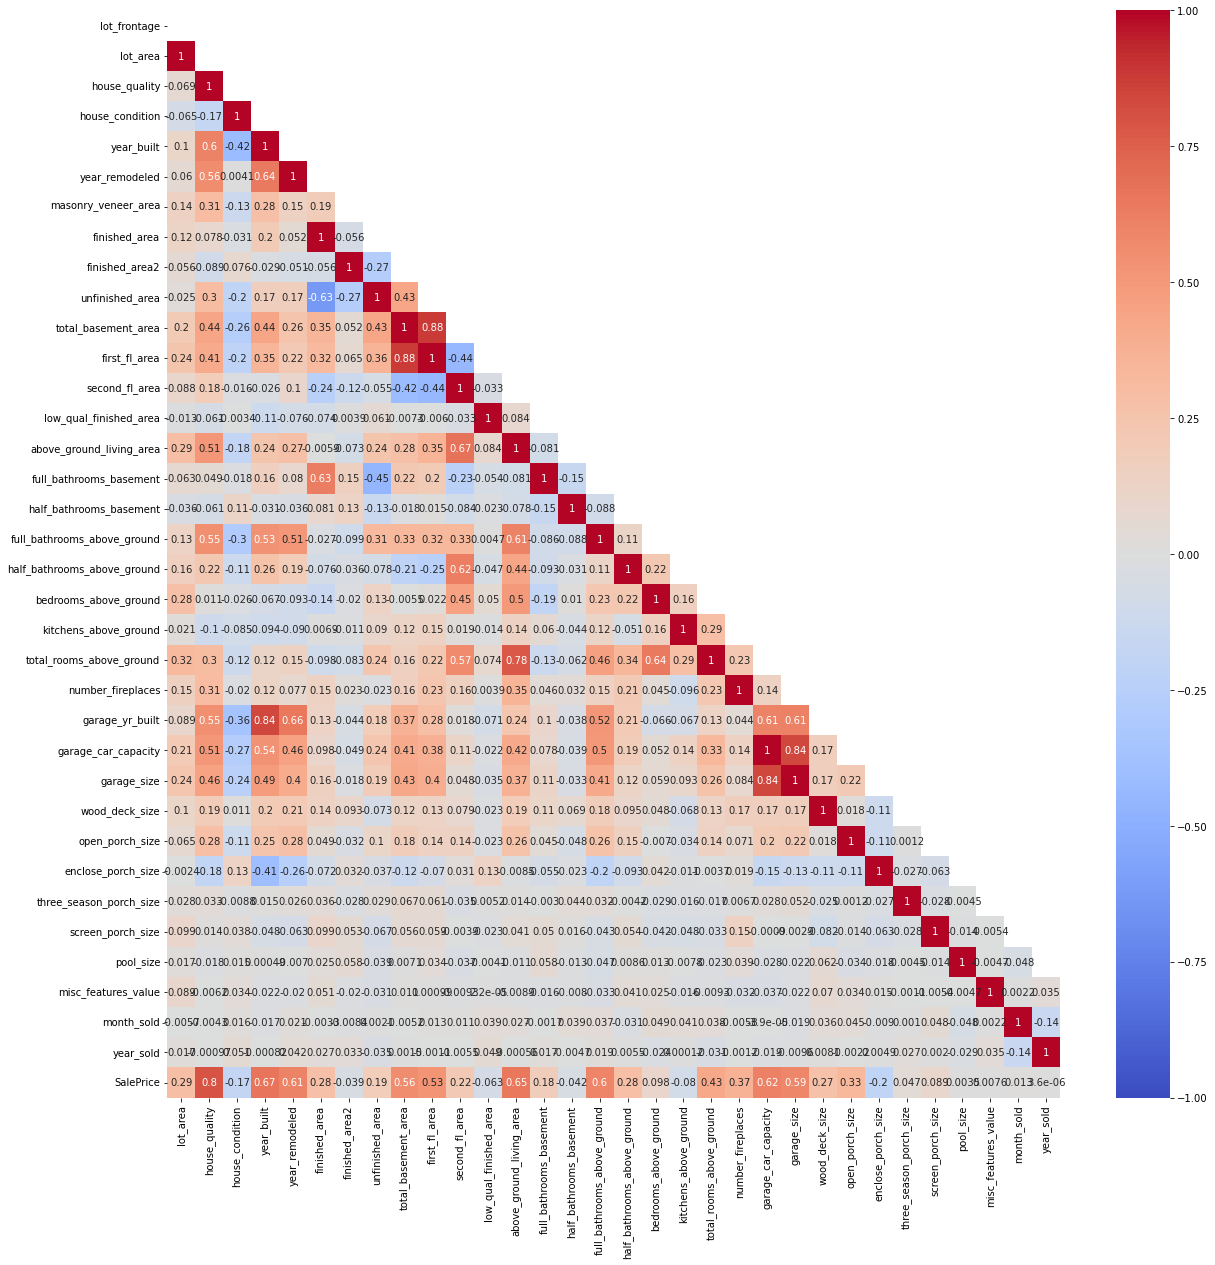

In [34]:
plt.figure(figsize= (20,20))

mask = np.zeros_like(train.corr()[features])
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr()[features],
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm',
            mask = mask
           );

In [35]:
train[['total_basement_area','first_fl_area']].corr()

,total_basement_area,first_fl_area
total_basement_area,1.000000,0.876148
first_fl_area,0.876148,1.000000


### Re-run numerical model after dropping collinear columns

In [36]:
features = [col for col in test._get_numeric_data().columns if col != 'SalePrice' and test[col].isnull().sum() == 0 and col not in ['total_basement_area','first_fl_area']]

X = train[features]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'Training Shape: {X_train.shape, y_train.shape}')
print(f'Test Shape: {X_test.shape, y_test.shape}')

lr = LinearRegression()
lr.fit(X_train, y_train)

Training Shape: ((954, 30), (954,))
Test Shape: ((318, 30), (318,))


LinearRegression()

In [37]:
print(f'Training Score: {lr.score(X_train, y_train)}')

print(f'Test Score: {lr.score(X_test, y_test)}')

# Cross Val Score to evaluate model
cross_val_score(lr, X_train, y_train).mean()

# Make predictions on test data
# add sale price column to test data set based on model
preds = lr.predict(test[features])
test['SalePrice'] = preds

# Create Data Frame with only Id and SalePrice for kaggle
all_numerical_submission_dropped_collinear = test[['Id', 'SalePrice']]

# set index for new DF
all_numerical_submission_dropped_collinear.set_index('Id', inplace=True)

# save submission
all_numerical_submission_dropped_collinear.to_csv('../data/all_numerical_submission_dropped_collinear.csv')

Training Score: 0.8798556232216683
Test Score: 0.8742177245601122


No improvement compared to original numerical entry - keep both columns (index = False).

In [38]:
coef_df = pd.DataFrame(lr.coef_, index = X.columns, columns = ['Coefficients'])
coef_df.sort_values(by = 'Coefficients', ascending = False)

,Coefficients
house_quality,12858.956542
house_condition,4499.735297
number_fireplaces,3850.630146
garage_car_capacity,2899.466089
total_rooms_above_ground,2505.143970
full_bathrooms_basement,1953.204174
full_bathrooms_above_ground,616.248055
year_built,349.845708
month_sold,237.323833
year_remodeled,224.718098


------
### *Handling Categorical Variables*

In [38]:
train.head()

,Id,parcel_id,dwelling_type,zoning_type,lot_frontage,lot_area,street_surface,alley_surface,property_shape,property_flatness,...,pool_size,pool_quality,fence_quality,misc_features,misc_features_value,month_sold,year_sold,sale_type,SalePrice,Garage Type
0,544,531379050,60,RL,43.0,11492.0,Pave,nan,IR1,Lvl,...,0.0,nan,nan,nan,0.0,4,2009,WD,220000.0,Attchd
1,153,535304180,20,RL,68.0,7922.0,Pave,nan,Reg,Lvl,...,0.0,nan,nan,nan,0.0,1,2010,WD,109000.0,Detchd
2,318,916386060,60,RL,73.0,9802.0,Pave,nan,Reg,Lvl,...,0.0,nan,nan,nan,0.0,4,2010,WD,174000.0,BuiltIn
3,255,906425045,50,RL,82.0,14235.0,Pave,nan,IR1,Lvl,...,0.0,nan,nan,nan,0.0,3,2010,WD,138500.0,Detchd
4,2827,908186070,180,RM,35.0,3675.0,Pave,nan,Reg,Lvl,...,0.0,nan,nan,nan,0.0,6,2006,New,140000.0,Basment


In [39]:
# changing Y/N and Paved/Gravel Columns to 1's and 0's
train['street_surface'] = train['street_surface'].map({'Pave': 1, 'Grvl': 0})
train['central_air'] = train['central_air'].map({'Y': 1, 'N':0})

test['street_surface'] = test['street_surface'].map({'Pave': 1, 'Grvl': 0})
test['central_air'] = test['central_air'].map({'Y': 1, 'N':0})

train.head()

,Id,parcel_id,dwelling_type,zoning_type,lot_frontage,lot_area,street_surface,alley_surface,property_shape,property_flatness,...,pool_size,pool_quality,fence_quality,misc_features,misc_features_value,month_sold,year_sold,sale_type,SalePrice,Garage Type
0,544,531379050,60,RL,43.0,11492.0,1,nan,IR1,Lvl,...,0.0,nan,nan,nan,0.0,4,2009,WD,220000.0,Attchd
1,153,535304180,20,RL,68.0,7922.0,1,nan,Reg,Lvl,...,0.0,nan,nan,nan,0.0,1,2010,WD,109000.0,Detchd
2,318,916386060,60,RL,73.0,9802.0,1,nan,Reg,Lvl,...,0.0,nan,nan,nan,0.0,4,2010,WD,174000.0,BuiltIn
3,255,906425045,50,RL,82.0,14235.0,1,nan,IR1,Lvl,...,0.0,nan,nan,nan,0.0,3,2010,WD,138500.0,Detchd
4,2827,908186070,180,RM,35.0,3675.0,1,nan,Reg,Lvl,...,0.0,nan,nan,nan,0.0,6,2006,New,140000.0,Basment


In [40]:
# candidates for #'s rather than dummy variables
train['exterior_quality'] = train['exterior_quality'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['exterior_condition'] = train['exterior_condition'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train['basement_height'] = train['basement_height'].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['basement_condition'] = train['basement_condition'].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

train['heating_quality'] = train['heating_quality'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train['kitchen_quality'] = train['kitchen_quality'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train['fireplace_quality'] = train['fireplace_quality'].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

train['garage_quality'] = train['garage_quality'].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['garage_condition'] = train['garage_condition'].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

train['pool_quality'] = train['pool_quality'].map({np.nan:0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train['fence_quality'] = train['fence_quality'].map({np.nan:0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})


test['exterior_quality'] = test['exterior_quality'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
test['exterior_condition'] = test['exterior_condition'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

test['basement_height'] = test['basement_height'].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test['basement_condition'] = test['basement_condition'].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

test['heating_quality'] = test['heating_quality'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

test['kitchen_quality'] = test['kitchen_quality'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

test['fireplace_quality'] = test['fireplace_quality'].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

test['garage_quality'] = test['garage_quality'].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test['garage_condition'] = test['garage_condition'].map({np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

test['pool_quality'] = test['pool_quality'].map({np.nan:0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

test['fence_quality'] = test['fence_quality'].map({np.nan:0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})

print(train.shape)
print(test.shape)

(1272, 82)
(878, 82)


------
## **Model 5:** *Numbers replacing categorical variables*

In [41]:
features = [col for col in test._get_numeric_data().columns if col != 'SalePrice' and test[col].isnull().sum() == 0]

In [42]:
# Created function that takes features list and instantiates and runs a linear regression on those features
X = train[features]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'Training Score: {lr.score(X_train, y_train)}')
print(f'Test Score: {lr.score(X_test, y_test)}')

Training Score: 0.8898394072586665
Test Score: 0.8859250764243847


In [43]:
# Cross Val Score to evaluate model
cross_val_score(lr, X_train, y_train).mean()

0.8830207643831214

In [44]:
#adjusted R-Squared Training data
r2 = lr.score(X_train, y_train)
print(f'Adjusted R-Squared for training: {1 - (((1-r2) * (len(y-1))) / (len(y) - len(features) -1))}')

#adjusted R-Squared Test data
r2 = lr.score(X_test, y_test)
print(f'Adjusted R-Squared for test: {1 - (((1-r2) * (len(y-1))) / (len(y) - len(features) -1))}')

#Root Mean Squared Error
X_test_predictions = lr.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, X_test_predictions))
print(f'Root Mean Squared Error: {rmse}')

Adjusted R-Squared for training: 0.8863550089481134
Adjusted R-Squared for test: 0.8823168671628688
Root Mean Squared Error: 17650.109329111903


Predicted home sale price off by about $17,650 on average relative to observed price. 

In [45]:
# Make predictions on test data
preds = lr.predict(test[features])

preds.shape

(878,)

In [46]:
# add sale price column to test data set based on model
test['SalePrice'] = preds

# Create Data Frame with only Id and SalePrice for kaggle
categories_converted_numbers = test[['Id', 'SalePrice']]

# set index for new DF
categories_converted_numbers.set_index('Id', inplace=True)
categories_converted_numbers.head()

# save submission
categories_converted_numbers.to_csv('../data/categories_converted_numbers.csv')

-----
### *Candidates for dropping collinear features?*

In [47]:
train[['garage_yr_built','year_built']].corr()

,garage_yr_built,year_built
garage_yr_built,1.000000,0.838711
year_built,0.838711,1.000000


In [48]:
train[['garage_yr_built','year_remodeled']].corr()

,garage_yr_built,year_remodeled
garage_yr_built,1.000000,0.655113
year_remodeled,0.655113,1.000000


In [49]:
train[['house_quality','house_condition']].corr()

,house_quality,house_condition
house_quality,1.000000,-0.168692
house_condition,-0.168692,1.000000


In [50]:
train[['basement_height','basement_condition']].corr()

,basement_height,basement_condition
basement_height,1.000000,0.207477
basement_condition,0.207477,1.000000


In [51]:
train[['exterior_quality','exterior_condition']].corr()

,exterior_quality,exterior_condition
exterior_quality,1.000000,-0.021418
exterior_condition,-0.021418,1.000000


In [52]:
train[['garage_quality','garage_condition']].corr()

,garage_quality,garage_condition
garage_quality,1.000000,0.553248
garage_condition,0.553248,1.000000


##### *No significant correlation (> 90%) between features. Hold off on dropping collinear features.*

In [53]:
# concat the data frames before using get dummies
print(train.shape)
print(test.shape)
print("--"*10)

#concat the data frames
train_test_combined = pd.concat([train, test])
print(train_test_combined.shape)
train_test_combined[1270:1275]

(1272, 82)
(878, 82)
--------------------
(2150, 82)


,Id,parcel_id,dwelling_type,zoning_type,lot_frontage,lot_area,street_surface,alley_surface,property_shape,property_flatness,...,pool_size,pool_quality,fence_quality,misc_features,misc_features_value,month_sold,year_sold,sale_type,SalePrice,Garage Type
1270,639,535179160,20,RL,80.0,10400.0,1,nan,Reg,Lvl,...,0.0,NaN,NaN,nan,0.0,11,2009,WD,144000.000000,Attchd
1271,10,527162130,60,RL,60.0,7500.0,1,nan,Reg,Lvl,...,0.0,NaN,NaN,nan,0.0,6,2010,WD,189000.000000,Attchd
0,2658,902301120,190,RM,69.0,9142.0,1,Grvl,Reg,Lvl,...,0.0,NaN,NaN,nan,0.0,4,2006,WD,130836.802864,Detchd
1,2718,905108090,90,RL,NaN,9662.0,1,nan,IR1,Lvl,...,0.0,NaN,NaN,nan,0.0,8,2006,WD,147737.967592,Attchd
2,2414,528218130,60,RL,58.0,17104.0,1,nan,IR1,Lvl,...,0.0,NaN,NaN,nan,0.0,9,2006,New,217522.660604,Attchd


-----

### *Binarize the remaining categorical columns using Get Dummies*

In [54]:
train_test_combined = pd.get_dummies(data = train_test_combined, columns = ['dwelling_type',
                                                'street_surface','alley_surface','property_shape',
                                                'property_flatness','lot_position','property_slope','ames_neighborhood','prox_to_transport','prox_to_transport_2',
                                                'bldg_type', 'floors','house_quality','house_condition','roof_style', 'roof_material','ext_covering',
                                                 'ext_covering2','masonry_veneer_type','foundation_type','basement_walkouts','basement_finished_rating',
                                                 'basement_finished_rating2', 'heating_type','central_air','electrical_setup','home_functionality',
                                                'garage_location', 'garage_finished', 'garage_car_capacity','driveway_surface','misc_features', 'sale_type'], 
                                                drop_first = True)

In [55]:
train_test_combined.shape

(2150, 251)

In [56]:
train = train_test_combined[0:1272]
print(train.shape)

(1272, 251)


In [57]:
test = train_test_combined[1272:]
print(test.shape)

(878, 251)


In [58]:
test.head()

,Id,parcel_id,zoning_type,lot_frontage,lot_area,util_avail,year_built,year_remodeled,masonry_veneer_area,exterior_quality,...,misc_features_nan,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,902301120,RM,69.0,9142.0,AllPub,1910,1950,0.0,2,...,1,0,0,0,0,0,0,0,0,1
1,2718,905108090,RL,NaN,9662.0,AllPub,1977,1977,0.0,2,...,1,0,0,0,0,0,0,0,0,1
2,2414,528218130,RL,58.0,17104.0,AllPub,2006,2006,0.0,3,...,1,0,0,0,0,0,1,0,0,0
3,1989,902207150,RM,60.0,8520.0,AllPub,1923,2006,0.0,3,...,1,0,0,0,0,0,0,0,0,1
4,625,535105100,RL,NaN,9500.0,AllPub,1963,1963,247.0,2,...,1,0,0,0,0,0,0,0,0,1


------

Feeling better about the cleaning and preprocessing - time to look at feature engineering to boost the model. 

### Write the preprocessed DFs to a csv file for use in next notebook

In [59]:
train.to_csv('../data/train_preprocessed.csv', index=False)
test.to_csv('../data/test_preprocessed.csv', index=False)
print(train.shape)
print(test.shape)

(1272, 251)
(878, 251)
